# seaborn

In [1]:
# !pip install seaborn
import seaborn as sns

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
tips = pd.read_csv('data/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


### relplot() : 여러 속성을 동시에 파악할 수 있는 장점

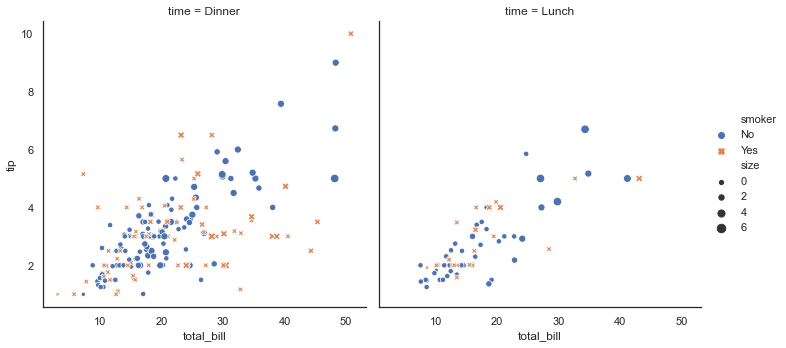

In [43]:
sns.set()
# sns.set_style('white')

sns.relplot(x='total_bill', y='tip', col='time',
           hue='smoker', style='smoker', size='size',
           data=tips)

#### 흡연유형에 따른 요일별 총 지불액

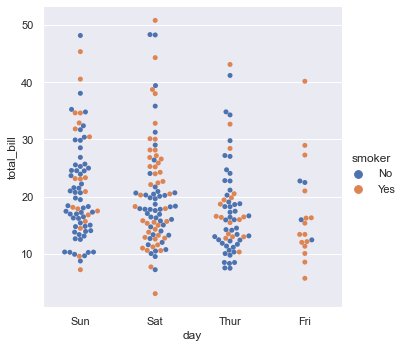

In [28]:
sns.catplot(x='day', y='total_bill', hue='smoker', kind='swarm', data=tips)

### 요일별 팁 금액 이상치 확인 및 총지불액 - 팁금액 산점도

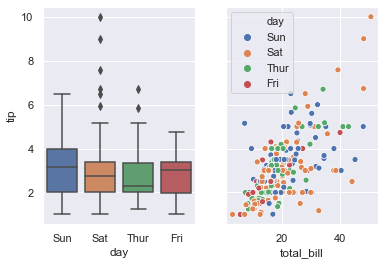

In [29]:
f, axes = plt.subplots(1,2, sharey=True, figsize=(6,4))
sns.boxplot(x='day',y='tip', data=tips, ax=axes[0])
sns.scatterplot(x='total_bill', y='tip', hue='day', data=tips, ax=axes[1])

#### 연습문제) 요일별 사이즈별 파티 횟수를 카운트하여 막대그래프 시각화(단,size 2,3,4인만 대상)

In [18]:
~tips['size'].isin([1,6]) # boolean indexing

0      True
1      True
2      True
3      True
4      True
       ... 
239    True
240    True
241    True
242    True
243    True
Name: size, Length: 244, dtype: bool

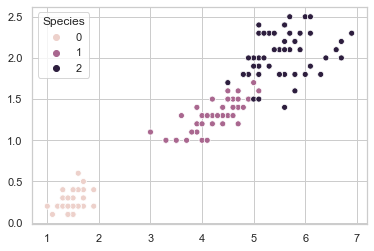

In [62]:
from sklearn import datasets

iris_dataset = datasets.load_iris()
X = iris_dataset.data

fig, ax = plt.subplots()
sns.set(style='whitegrid')
sns.scatterplot(x=X[:,2], y=X[:,3],
               hue = iris_dataset.target,
               hue_order = iris_dataset.target_names)
plt.legend(title='Species')
plt.show()

---

## melt

### 1. 1개의 열만 고정하고 나머지 열을 행으로 바꾸기

In [67]:
import pandas as pd
pew = pd.read_csv("./data/pew.csv")
pew.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [65]:
pew_long = pd.melt(pew, id_vars = 'religion')
pew_long

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [68]:
pew_long = pd.melt(pew, id_vars = 'religion', var_name='income', value_name='count')
pew_long

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


---

## BeautifulSoup4 패키지
- html, xml, ... 형식의 문서에서 필요 내용을 추출할 때 이용

In [70]:
from bs4 import BeautifulSoup
import urllib.request as req
import os.path

In [72]:
url = 'http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=108' # 기상청 육상 중기예보
res = req.urlopen(url)

In [73]:
soup = BeautifulSoup(res,'html.parser')
soup

<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link/>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubdate>2020년 09월 08일 (화)요일 06:00</pubdate>
<item>
<author>기상청</author>
<category>육상중기예보</category>
<title>전국 육상 중기예보 - 2020년 09월 08일 (화)요일 06:00 발표</title>
<link/>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp
<guid>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</guid>
<description>
<header>
<title>전국 육상중기예보</title>
<tm>202009080600</tm>
<wf><![CDATA[○ (강수) 11일(금)부터 13일(일)까지 강원영동에 비가 오겠습니다.<br />○ (기온) 이번 예보기간의 낮 기온은 22~30도로 어제(20~27도)보다 높겠습니다.<br />○ (주말전망) 12일(토)과 13일(일)은 전국이 가끔 구름많겠으나, 강원영동은 흐리고 비가 오겠고, 아침 기온은 16~21도, 낮 기온은 22~30도 분포를 보이겠습니다.<br /><br />* 당분간 우리나라 상공에 차가운 공기가 머물면서 불안정이 강화되어 강수구역 및 시점의 변동성이 크겠으니, 앞으로 발표되는 기상정보를 참고하기 바랍니다.]]></wf>
</header>
<body>
<location wl_ver="3">
<province>서울ㆍ인천ㆍ경기도</province>
<city>서울<

In [84]:
title = soup.find('title').string
wf = soup.find('wf').string

In [82]:
print(soup.find('title'))
soup.find_all('title')

<title>기상청 육상 중기예보</title>


[<title>기상청 육상 중기예보</title>,
 <title>전국 육상 중기예보 - 2020년 09월 08일 (화)요일 06:00 발표</title>,
 <title>전국 육상중기예보</title>]

In [85]:
print(type(soup.find('title')))
print(type(soup.find_all('title')))

<class 'bs4.element.Tag'>
<class 'bs4.element.ResultSet'>


In [89]:
soup.find('title').string

'기상청 육상 중기예보'

In [96]:
soup.find_all('title')[0].string

'기상청 육상 중기예보'

In [108]:
a = soup.find_all('location')
a[0]

<location wl_ver="3">
<province>서울ㆍ인천ㆍ경기도</province>
<city>서울</city>
<data>
<mode>A02</mode>
<tmef>2020-09-11 00:00</tmef>
<wf>구름많음</wf>
<tmn>19</tmn>
<tmx>27</tmx>
<reliability></reliability>
<rnst>30</rnst>
</data>
<data>
<mode>A02</mode>
<tmef>2020-09-11 12:00</tmef>
<wf>흐림</wf>
<tmn>19</tmn>
<tmx>27</tmx>
<reliability></reliability>
<rnst>40</rnst>
</data>
<data>
<mode>A02</mode>
<tmef>2020-09-12 00:00</tmef>
<wf>흐림</wf>
<tmn>20</tmn>
<tmx>27</tmx>
<reliability></reliability>
<rnst>40</rnst>
</data>
<data>
<mode>A02</mode>
<tmef>2020-09-12 12:00</tmef>
<wf>흐림</wf>
<tmn>20</tmn>
<tmx>27</tmx>
<reliability></reliability>
<rnst>40</rnst>
</data>
<data>
<mode>A02</mode>
<tmef>2020-09-13 00:00</tmef>
<wf>맑음</wf>
<tmn>19</tmn>
<tmx>27</tmx>
<reliability></reliability>
<rnst>20</rnst>
</data>
<data>
<mode>A02</mode>
<tmef>2020-09-13 12:00</tmef>
<wf>맑음</wf>
<tmn>19</tmn>
<tmx>27</tmx>
<reliability></reliability>
<rnst>20</rnst>
</data>
<data>
<mode>A02</mode>
<tmef>2020-09-14 00:00</tmef>

In [111]:
seoul = a[0]
seoul.find_all('wf')

[<wf>구름많음</wf>,
 <wf>흐림</wf>,
 <wf>흐림</wf>,
 <wf>흐림</wf>,
 <wf>맑음</wf>,
 <wf>맑음</wf>,
 <wf>맑음</wf>,
 <wf>맑음</wf>,
 <wf>맑음</wf>,
 <wf>구름많음</wf>,
 <wf>구름많음</wf>,
 <wf>맑음</wf>,
 <wf>맑음</wf>]